# git2net - Extracting and analysing co-editing relationships from git repositories
In this tutorial you will learn the basic steps required to obtain a co-editing relationship from a git repoitory using git2net.

The tutorial assumes you have git2net installed. In addition, it is recommended to create a folder for this tutorial as additional files will be downloaded to your local directory (if not specified otherwise).

 +---------------+   git2net          +---------------+
 | Repository on | -----------------> | local         |
 | Github        | clone_repository() | repository    |
 +---------------+   (1)              +---------------+
                                        | git2net 
                                        | mine_git_repo()
                                        v (2)
 +---------------+   pandas           +---------------+
 | pandas        |<------------------ | sqlite data   |
 | dataframe     |  read_sql_query()  | base          |
 +---------------+                    +---------------+ 
      |                                       |
      v                                       v
 Data mining (4)                      Network analysis (3)
The following sections are structured according to this process model:

    Repository Cloning
    Repository Mining
    Network Analysis and visualization (git2net)
    Data analysis (pandas)
## Repository Cloning
To start, you will need to select and clone a git repository that you are interested in analysing. For the purpose of this tutorial, we will analyse the repository behind git2net—aiming to finally find a solution to the well-known chicken and egg problem.

The following lines will clone the git2net repository to your current working directory. To change this location, you can edit the path to the local directory stored in local_directory. The folder name of the repository is the name of the repository, which we store in repo_name.

In [1]:
import pygit2 as git2
import os
import shutil

git_repo_url = 'https://github.com/gotec/git2net.git'
local_directory = '.'
git_repo_dir = 'git2net4analysis'

if os.path.exists(git_repo_dir):
    shutil.rmtree(git_repo_dir)

repo = git2.clone_repository(git_repo_url, git_repo_dir) # Clones a non-bare repository

Private repositories require some more efforts. Firstly, you have to generate a personal token. The procedure on GitHub side is explained here. Make sure to copy your new access token to a file (secret.txt for instance). You won’t be able to see it again! Please add secret.txt directly to your .gitignore file! You wouldn't believe how many access tokens are freely available at github :-)

Now we are able to pass the token as a third parameter embedded in a callback method to clone_repository().

## Repository Mining
Now that we have obtained a local copy of the repository, we can use git2net to obtain a database containing information on all commits and edits made to obtain the current state of the repository.

To do so, we use the mine_git_repo function. This function takes two required inputs as well as a number of optional inputs, some of which we will further explore later in this tutorial. Let's start with the required inputs. Here, we need to supply a path to the git repositoy that will be analysed. Below, this is done with the variable repo_name. In addition, git2net requires a path to the sqlite database that will be filled during the mining process. This path is provided as sqlite_db_file.

Note, that if no database exists on the supplied path, git2net will create a new database. If a database exists, git2net will check if the database was mined with the same setting and on the same repository and subsequently resume the mining process from wherever it was left off.

Let's try this out. Below we import git2net and point it to the path to which we cloned the database. In addition, we specify the location of the database file in which the results of the mining process will be stored and ensure the database does currently not exist. We then run the mine_git_repo function with the optional argument max_modifications = 1. With this only commits in which 1 or less files were modified are mined.

In [8]:
import git2net

sqlite_db_file = 'git2net.db'

# Remove database if exists
if os.path.exists(sqlite_db_file):
    os.remove(sqlite_db_file)

max_modifications = 1
    
git2net.mine_git_repo(git_repo_dir, sqlite_db_file, max_modifications=max_modifications)

Found no database on provided path. Starting from scratch.


Parallel (24 processes):   3%|▎         | 7/213 [00:02<01:12,  2.82it/s]

Commit exceeding max_modifications:  bd0ad7b12500239321a8b7c6ba547f6111c781bb


Parallel (24 processes):   7%|▋         | 14/213 [00:04<00:47,  4.21it/s]

Commit exceeding max_modifications:  eed200119f675f2abc69a5f72c3505e903b82fd2


Parallel (24 processes):  14%|█▎        | 29/213 [00:07<00:42,  4.34it/s]

Commit exceeding max_modifications:  40cc53f783aeb835fbec20f4d5e165af4e24fd32


Parallel (24 processes):  16%|█▌        | 34/213 [00:08<00:42,  4.21it/s]

Commit exceeding max_modifications:  9a042c9c7c6a99733d1b94bf0d440f5d22389a79


Parallel (24 processes):  17%|█▋        | 36/213 [00:09<00:37,  4.66it/s]

Commit exceeding max_modifications:  a2d25731c924765db4f21fa3afa7d263b7c9e79d
Commit exceeding max_modifications:  c657e752b411caf531e3fff8fc0ea8e0b756ed43


Parallel (24 processes):  19%|█▉        | 41/213 [00:10<00:40,  4.25it/s]

Commit exceeding max_modifications:  87c4d8f3206b400785602de03bdf87f109a65008


Parallel (24 processes):  20%|██        | 43/213 [00:10<00:41,  4.09it/s]

Commit exceeding max_modifications:  95eb238eeb60d6f4d1eee5acdba1d195d6e0cf70
Commit exceeding max_modifications:  16b2226a47e2747a3de9ff07f5fec0ad1abd8e0c


Parallel (24 processes):  21%|██        | 45/213 [00:11<00:37,  4.48it/s]

Commit exceeding max_modifications:  f8e0c813a4a3049725b4c65a69bf0b487a685276


Parallel (24 processes):  22%|██▏       | 46/213 [00:11<00:35,  4.71it/s]

Commit exceeding max_modifications:  eb40bbb2e7c68c7ab73bef6d91b41d2376581907


Parallel (24 processes):  22%|██▏       | 47/213 [00:11<00:44,  3.71it/s]

Commit exceeding max_modifications:  64701617d0d468bba66760046d5519c54c7f3371


Parallel (24 processes):  23%|██▎       | 48/213 [00:12<01:05,  2.52it/s]

Commit exceeding max_modifications:  c81b190fe260050fcd7ff86a7e947b47cf8f8085


Parallel (24 processes):  23%|██▎       | 50/213 [00:13<01:06,  2.47it/s]

Commit exceeding max_modifications:  e75736eaf9bd01e6f410c4dc51d9e58dcf20eacb
Commit exceeding max_modifications:  91d5d98881c6289f42f30508c4b26d3fa7baf6ca


Parallel (24 processes):  27%|██▋       | 57/213 [00:15<00:56,  2.74it/s]

Commit exceeding max_modifications:  240a13c3b87558cb85963d3cda415a63b54a8cbf


Parallel (24 processes):  31%|███       | 66/213 [00:18<00:45,  3.24it/s]

Commit exceeding max_modifications:  a3213cd995e850c8966355755c4ac2ff61f65503


Parallel (24 processes):  35%|███▍      | 74/213 [00:20<00:34,  4.07it/s]

Commit exceeding max_modifications:  9ef69d206d7cedb82b12d68a39445b2e936cd15f


Parallel (24 processes):  35%|███▌      | 75/213 [00:20<00:33,  4.17it/s]

Commit exceeding max_modifications:  71b1cd496f6dc800acd7e59260d86b647cc58291
Commit exceeding max_modifications:  806fc44d2250c316c75692601362aecabc63d137


Parallel (24 processes):  38%|███▊      | 80/213 [00:21<00:33,  3.95it/s]

Commit exceeding max_modifications:  9e72df61bf300b42c3fbc16d94153e8edbbe6dd6


Parallel (24 processes):  39%|███▉      | 83/213 [00:22<00:27,  4.65it/s]

Commit exceeding max_modifications:  090c00c342283134a23900f85c1d232499617365


Parallel (24 processes):  40%|███▉      | 85/213 [00:22<00:35,  3.63it/s]

Commit exceeding max_modifications:  509e1394637f74a357ef2bf0c567dc6520a80eb6
Commit exceeding max_modifications:  cf51fa8ddf40c85645cf9e6e7fb5c64b322a20ef


Parallel (24 processes):  41%|████      | 87/213 [00:23<00:29,  4.23it/s]

Commit exceeding max_modifications:  73e2b77a786cf19ec4a04e0a95ae4a0f93c45c54


Parallel (24 processes):  42%|████▏     | 89/213 [00:23<00:22,  5.39it/s]

Commit exceeding max_modifications:  1504d68a4daf1e7529c6ac1a192794da765da9d2


Parallel (24 processes):  42%|████▏     | 90/213 [00:23<00:23,  5.25it/s]

Commit exceeding max_modifications:  b3b8e33bd6ae43ba9ff50f4b84cc2c6c897fe92b


Parallel (24 processes):  43%|████▎     | 91/213 [00:23<00:21,  5.79it/s]

Commit exceeding max_modifications:  2294efe5bf28560eb11437f54e18c4ff710e2bd1


Parallel (24 processes):  45%|████▌     | 96/213 [00:25<00:34,  3.44it/s]

Commit exceeding max_modifications:  7e7a8bd30a12628028234308ae6c7e2f5b5ec2b2


Parallel (24 processes):  46%|████▋     | 99/213 [00:25<00:25,  4.45it/s]

Commit exceeding max_modifications:  0a8bc07dfd7c481b8936fddd99e7a8a8aac74dfe


Parallel (24 processes):  54%|█████▎    | 114/213 [00:29<00:28,  3.43it/s]

Commit exceeding max_modifications:  6b837c8f5383d16434afa0eaaab347873113230b


Parallel (24 processes):  56%|█████▌    | 119/213 [00:30<00:21,  4.35it/s]

Commit exceeding max_modifications:  5e259c75123f17c47e270eace26145fe1f20167b


Parallel (24 processes):  56%|█████▋    | 120/213 [00:30<00:22,  4.19it/s]

Commit exceeding max_modifications:  03d8af2aee9f4b4f320ec83deecccf9245b8ce03
Commit exceeding max_modifications:  bbc55b0ec194710e39bfe098acaf930598eb045c


Parallel (24 processes):  58%|█████▊    | 123/213 [00:31<00:19,  4.68it/s]

Commit exceeding max_modifications:  4515874def08a49af37a4d47615a2e05dc508d89


Parallel (24 processes):  59%|█████▊    | 125/213 [00:32<00:28,  3.13it/s]

Commit exceeding max_modifications:  4de4c314a1261e784f1a54969a32ab4dfa439d76


Parallel (24 processes):  59%|█████▉    | 126/213 [00:32<00:24,  3.50it/s]

Commit exceeding max_modifications:  8a5d405bc8263b6f482f9e6c38534023de8956e5


Parallel (24 processes):  60%|█████▉    | 127/213 [00:32<00:24,  3.51it/s]

Commit exceeding max_modifications:  3f6435c4acbf8d1b6b02e9be02b514c2c2d53446


Parallel (24 processes):  62%|██████▏   | 132/213 [00:34<00:27,  2.95it/s]

Commit exceeding max_modifications:  839a9501b36ade7481f9a50fe91e57f690b1570f


Parallel (24 processes):  63%|██████▎   | 135/213 [00:35<00:22,  3.50it/s]

Commit exceeding max_modifications:  ed7b0b70e6062c4ab9f5f66d99f3413b3b983d94
Commit exceeding max_modifications:  bf62853697e83eb52863ef433d5e0771f1b4273d


Parallel (24 processes):  64%|██████▍   | 137/213 [00:35<00:18,  4.19it/s]

Commit exceeding max_modifications:  8e5219f0da4da3781e6274708f00cace52a8ee6f


Parallel (24 processes):  68%|██████▊   | 144/213 [00:37<00:22,  3.11it/s]

Commit exceeding max_modifications:  6f9b1ad5ee73c87750ef6c1d48f3580d4b4e35ac


Parallel (24 processes):  70%|██████▉   | 149/213 [00:38<00:17,  3.70it/s]

Commit exceeding max_modifications:  77341fec9057940ff7fd75dd780d3eec9c0b2bb1


Parallel (24 processes):  70%|███████   | 150/213 [00:38<00:19,  3.28it/s]

Commit exceeding max_modifications:  c2d7f0cf365472789d4e369a4fb5ad6da5e19278


Parallel (24 processes):  72%|███████▏  | 153/213 [00:39<00:24,  2.45it/s]

Commit exceeding max_modifications:  9d5dd27c210a0306e0bf193af6ad567e0edac0b3


Parallel (24 processes):  73%|███████▎  | 155/213 [00:40<00:21,  2.76it/s]

Commit exceeding max_modifications:  5b6e6953445fe01ec1317a482239307fbdc2ca27


Parallel (24 processes):  75%|███████▍  | 159/213 [00:41<00:18,  2.86it/s]

Commit exceeding max_modifications:  7df9aefe5f71d70e6bdd26b6f1c242c547be670e


Parallel (24 processes):  76%|███████▌  | 161/213 [00:42<00:20,  2.50it/s]

Commit exceeding max_modifications:  2fe35a2c8001ef7f1494eb32b175baaa6615f3a5


Parallel (24 processes):  77%|███████▋  | 163/213 [00:43<00:16,  2.94it/s]

Commit exceeding max_modifications:  7e24ad664e91ee6da32c999e66bc374023657af1


Parallel (24 processes):  77%|███████▋  | 165/213 [00:43<00:18,  2.64it/s]

Commit exceeding max_modifications:  ed9f24ef27a185a1b4dec32777f6e7cb0491113a
Commit exceeding max_modifications:  2fe365271e5f1506a17724fbb83af5db0ad49cfa


Parallel (24 processes):  78%|███████▊  | 166/213 [00:44<00:27,  1.69it/s]

Commit exceeding max_modifications:  23f26b519e913580d02c7755f7617125683a784f


Parallel (24 processes):  81%|████████  | 173/213 [00:48<00:18,  2.12it/s]

Commit exceeding max_modifications:  256e113a3592167b10456496d804a04592395d09


Parallel (24 processes):  82%|████████▏ | 174/213 [00:49<00:20,  1.89it/s]

Commit exceeding max_modifications:  15318963c6a4c25bbcff4182d3f55a17f1393e69


Parallel (24 processes):  83%|████████▎ | 176/213 [00:49<00:16,  2.30it/s]

Commit exceeding max_modifications:  d758d4c10b5c98a5d5dcaf5652de6cb791591669


Parallel (24 processes):  84%|████████▍ | 179/213 [00:50<00:16,  2.07it/s]

Commit exceeding max_modifications:  5349d14fc3b4da1bf97d64c4537140acd9d7c962


Parallel (24 processes):  85%|████████▌ | 182/213 [00:51<00:13,  2.22it/s]

Commit exceeding max_modifications:  542ffb6935793a27d710dfd01ffc7797754769ed
Commit exceeding max_modifications:  70a5836f1a6e8b2109c352608a737c56647a542b


Parallel (24 processes):  88%|████████▊ | 188/213 [00:54<00:13,  1.87it/s]

Commit exceeding max_modifications:  c442dd375f9f4e23982b4708fb7e096a47c8d395


Parallel (24 processes):  90%|████████▉ | 191/213 [00:55<00:10,  2.17it/s]

Commit exceeding max_modifications:  1b66ee94df628da88dab7905c3edadf87d8d92d7


Parallel (24 processes):  92%|█████████▏| 196/213 [00:57<00:06,  2.44it/s]

Commit exceeding max_modifications:  0ade8b9347b9a7078c2349f183a3c2c8470ac51c


Parallel (24 processes):  92%|█████████▏| 197/213 [00:58<00:06,  2.61it/s]

Commit exceeding max_modifications:  59fd7557e6dc12b1ae5fb4c5140b63b9b7dc268f


Parallel (24 processes):  94%|█████████▍| 201/213 [00:59<00:03,  3.09it/s]

Commit exceeding max_modifications:  2d354bc002f4b71636bf2dbf188c5de835fbfc2d


Parallel (24 processes):  99%|█████████▊| 210/213 [01:01<00:00,  3.74it/s]

Commit exceeding max_modifications:  e56c7dacd4c8d20d9f4fb1cd88d4f565abd28de7


Parallel (24 processes): 100%|██████████| 213/213 [01:01<00:00,  3.46it/s]


While mining, git2net provides information about the current progress. The first line shows that no database was found at the current path and mining will be started from scratch. This is totally expected, as we deliberately deleted any existing database before the run.

Subsequently, progress updates on the mining process are printed. The first information denotes the number of processes git2net spawns and runs on. git2net is highly parallelised and will automatically detect the number of threads of your CPU, fully utilising all of them during operation. In case you want to reduce this load, this can be done by specifically setting the number of processes with the no_of_processes option of the mine_git_repo function.

The other output shows the number of commits and total number of commits mined in this run, as well as the elapsed time and an estimate of the remaining time to finish.

If a commit is skipped, the reason and the commit hash are printed. Currently, there are three cases in which a commit can be skipped. Firstly, as seen above a commit can exceed the maximum number of modifications set by max_modifications. Secondly, processing the commit can take longer as a maximum time defined by the timeout option. Thirdly, a commit can be skipped due to an error occuring within the commit. In these cases, please report the repository and commit hash in a new issue on github.com/gotec/git2net.

Let's resume the mining process while increasing the maximum number of modifications to 5!

In [12]:
max_modifications = 5

git2net.mine_git_repo(git_repo_dir, sqlite_db_file, max_modifications=max_modifications)

Found a matching database on provided path. Skipping 148 (69.48%) of 213 commits. 65 commits remaining.


Parallel (24 processes):  17%|█▋        | 11/65 [00:05<00:17,  3.14it/s]

Commit exceeding max_modifications:  a3213cd995e850c8966355755c4ac2ff61f65503


Parallel (24 processes):  22%|██▏       | 14/65 [00:06<00:16,  3.12it/s]

Commit exceeding max_modifications:  9e72df61bf300b42c3fbc16d94153e8edbbe6dd6


Parallel (24 processes):  23%|██▎       | 15/65 [00:06<00:16,  3.11it/s]

Commit exceeding max_modifications:  090c00c342283134a23900f85c1d232499617365


Parallel (24 processes):  37%|███▋      | 24/65 [00:07<00:09,  4.28it/s]

Commit exceeding max_modifications:  6b837c8f5383d16434afa0eaaab347873113230b


Parallel (24 processes):  40%|████      | 26/65 [00:08<00:11,  3.41it/s]

Commit exceeding max_modifications:  bbc55b0ec194710e39bfe098acaf930598eb045c


Parallel (24 processes):  43%|████▎     | 28/65 [00:08<00:08,  4.30it/s]

Commit exceeding max_modifications:  4515874def08a49af37a4d47615a2e05dc508d89


Parallel (24 processes):  46%|████▌     | 30/65 [00:09<00:06,  5.00it/s]

Commit exceeding max_modifications:  3f6435c4acbf8d1b6b02e9be02b514c2c2d53446


Parallel (24 processes):  51%|█████     | 33/65 [00:10<00:08,  3.85it/s]

Commit exceeding max_modifications:  ed7b0b70e6062c4ab9f5f66d99f3413b3b983d94


Parallel (24 processes):  63%|██████▎   | 41/65 [00:13<00:09,  2.59it/s]

Commit exceeding max_modifications:  23f26b519e913580d02c7755f7617125683a784f


Parallel (24 processes): 100%|██████████| 65/65 [00:19<00:00,  3.42it/s]


As you can see from the output above, the process was resumed from the old database, skipping the already processed commits in the repository.

Great, we made some progress and a large amount of the commits in the repository are already mined and in the database! But what about the other ones? We get some more information on the commits missing from the database from the mining_state_summary function. Similar to mine_git_repo, it also requires the paths to the repository as well as the database.

In [13]:
git2net.mining_state_summary(git_repo_dir, sqlite_db_file)

  0%|          | 0/9 [00:00<?, ?it/s]

204 / 213 (95.77%) of commits were successfully mined.


100%|██████████| 9/9 [00:03<00:00,  2.91it/s]


,hash,is_merge,modifications,author_name,author_email,author_date
0,a3213cd995e850c8966355755c4ac2ff61f65503,False,18,Christoph Gote,cgote@ethz.ch,2019-02-15 15:39:38
1,9e72df61bf300b42c3fbc16d94153e8edbbe6dd6,False,7,Christoph Gote,cgote@ethz.ch,2019-04-10 17:40:01
2,090c00c342283134a23900f85c1d232499617365,False,9,Christoph Gote,cgote@ethz.ch,2019-04-10 18:26:54
3,6b837c8f5383d16434afa0eaaab347873113230b,False,6,Christoph Gote,cgote@ethz.ch,2019-09-23 16:32:25
4,bbc55b0ec194710e39bfe098acaf930598eb045c,True,7,Christoph Gote,gotec@me.com,2019-10-03 12:02:34
5,4515874def08a49af37a4d47615a2e05dc508d89,False,15,Christoph Gote,gotec@me.com,2019-10-03 12:37:41
6,3f6435c4acbf8d1b6b02e9be02b514c2c2d53446,False,16,Christoph Gote,gotec@me.com,2019-10-03 13:02:03
7,ed7b0b70e6062c4ab9f5f66d99f3413b3b983d94,False,20,Christoph Gote,cgote@ethz.ch,2019-11-04 19:08:31
8,23f26b519e913580d02c7755f7617125683a784f,False,6,Christoph Gote,gotec@me.com,2020-04-22 14:08:21


The function again provides a summary of the mining state, as well as details on all missing commits. Let's assume, we are very interest in commit 090c00c342283134a23900f85c1d232499617365 but want to avoid crawling the other missing commits. While this is uneccessary for small repositories such as git2net this might become higly relevant for larger projects such as linux, where individual commits can make changes to thousands of files which in turn require significant computational resources to analyse. This is particularly important for merge commits, as all files included in the diffs to both parent commits need to be considered. Therefore, for larger projects I generally recommend to run git2net with max_modifications = 1000, subsequently increasing this number if required.

But now back to mining specifically commit 090c00c342283134a23900f85c1d232499617365, which can be done with the commits option in mine_git_repo. We also set the number of processes to 1, enabling serial mode, which can be very helpful for debugging as significantly more information is printed.

In [14]:

# mine_git_repo takes list of commits
commits = ['090c00c342283134a23900f85c1d232499617365']

git2net.mine_git_repo(git_repo_dir, sqlite_db_file, commits=commits, no_of_processes=1)

Found a matching database on provided path. Skipping 204 (95.77%) of 213 commits. 9 commits remaining.


Serial: 100%|██████████| 1/1 [00:02<00:00,  2.19s/it]


Congratulations, you have now mined your first git repository using git2net! Note, though that not all commits have been mined at this point. This will be done at a later stage of this tutorial.

## Network Analysis and visualization
You can now use the database to query various information on different commits or edits. In addition, git2net also provides the functionality to generate various network projections of the data.

To start, lets try to obtain a co-editing network for our project. This is as simple as calling the get_coediting_network function and providing the database we just mined.

In [11]:
t, node_info, edge_info = git2net.get_coediting_network(sqlite_db_file)
t

The function returns a pathpy temporal network object as well as two dictionaries which can be used to return properties of nodes and edges. As of writing this tutorial not all of them are used but they are set as placeholders for future versions of git2net.

A pathpy temporal network object can be visualised by itself as shown above. In addition, we can also aggregate the network, by dropping the order of events, yielding a standard network object. Let's do this next.

In [15]:
import pathpy as pp
pp.Network.from_temporal_network(t)

In both the temporal and aggregated network, a node represents an author, whereas edges point from the person changing a line of code to the person who was the original author.

Next, we could ask the question which those files were that authors collaborated on. Therefore, we can plot a bipartite network containing both files and authors as nodes.

In [16]:
t, node_info, edge_info = git2net.get_bipartite_network(sqlite_db_file)
n = pp.Network.from_temporal_network(t)
n

For this network, node_info contains the classes of authors in the network. These can e.g. be used to color nodes as shown below.

In [17]:
colour_map = {'author': '#73D2DE', 'file': '#2E5EAA'}
node_color = {node: colour_map[node_info['class'][node]] for node in n.nodes}
pp.visualisation.plot(n, node_color=node_color)

The projection of this network that links authors editing the same file is the co-authorship network.

In [18]:
n, node_info, edge_info = git2net.get_coauthorship_network(sqlite_db_file)
n

Note that it looks similar, however, all information on the direction of interactions is lost.

If we are interested in e.g more recently edited files, we can filter the database by providing the time_from and time_to options. Let's check the files edited since May 2019.

In [19]:
from datetime import datetime
time_from = datetime(2019, 5, 1)
t, node_info, edge_info = git2net.get_bipartite_network(sqlite_db_file, time_from=time_from)
n = pp.Network.from_temporal_network(t)
colour_map = {'author': '#73D2DE', 'file': '#2E5EAA'}
node_color = {node: colour_map[node_info['class'][node]] for node in n.nodes}
pp.visualisation.plot(n, node_color=node_color)

git2net allows the extraction of editing paths on the level of individual lines. I.e. we are able to track consecutive changes made to a single line over time—even if these lines move up or down in a file, or even across files. This is very powerful, as it allows us to determine editing sequences as well as find lines that require more editing than others. These could either be very difficult lines to implement or contain very important information, such as the version number in an __init__.py file.

To extract these paths, we can use the get_line_editing_paths function. As these networks tend be very large we limit the analysis to a very small file for this tutorial. To only look at a specific set of file paths we can use the file_paths option.

In [20]:
file_paths = ['setup.py']
paths, dag, node_info, edge_info = git2net.get_line_editing_paths(sqlite_db_file, git_repo_dir,
                                                                  file_paths=file_paths)
pp.visualisation.plot(dag, node_color=node_info['colors'])

 22%|██▏       | 4/18 [00:00<00:00, 35.12it/s]

Querying commits
Querying edits


100%|██████████| 52/52 [00:00<00:00, 88696.14it/s]

2021-03-06 15:17:08 [Severity.INFO]	Creating paths from directed acyclic graph
2021-03-06 15:17:08 [Severity.INFO]	Expanding Subpaths
2021-03-06 15:17:08 [Severity.INFO]	Calculating sub path statistics ... 
2021-03-06 15:17:08 [Severity.INFO]	finished.


Notice, that despite only looking at a single file the network shown above is not connected. This is due to our database not being complete. Let's fix this now and try again.

In [21]:
git2net.mine_git_repo(git_repo_dir, sqlite_db_file)

Found a matching database on provided path. Skipping 205 (96.24%) of 213 commits. 8 commits remaining.


Parallel (24 processes): 100%|██████████| 8/8 [00:15<00:00,  1.90s/it]


In [22]:
paths, dag, node_info, edge_info = git2net.get_line_editing_paths(sqlite_db_file, git_repo_dir,
                                                                  file_paths=file_paths)
pp.visualisation.plot(dag, node_color=node_info['colors'], width=1000, height=1000)

 13%|█▎        | 4/31 [00:00<00:00, 38.61it/s]

Querying commits
Querying edits


100%|██████████| 60/60 [00:00<00:00, 57892.39it/s]

2021-03-06 15:18:57 [Severity.INFO]	Creating paths from directed acyclic graph
2021-03-06 15:18:57 [Severity.INFO]	Expanding Subpaths
2021-03-06 15:18:57 [Severity.INFO]	Calculating sub path statistics ... 
2021-03-06 15:18:57 [Severity.INFO]	finished.



As mentioned before, these networks get very large very quickly. Therefore, it is often more useful to work with the pathpy path object that is also returned by the function. It cointains all paths and subpaths contained in the network shown above. More information regarding this object can be found in the documentation on pathpy.net.

This concludes this tutorial, which I hope you found useful. Enjoy using git2net and best of luck for your research! If you find any bugs with the code please let me know on github.com.

git2net has been developed as open source project. This means your ideas and inputs are highly welcome. Feel free to share the project and contribute yourself. You can imediately get started on the repository you just downloaded!

## Data mining
Let's take a view on data base content. Obviously, we found two tables. The second code snippet illustrates the usage of sql statements to evaluate the content. We extract the unique author names from the commit list.

In [23]:
import sqlite3

db = sqlite3.connect(sqlite_db_file)
cursor = db.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
cursor.fetchall()

[('_metadata',), ('edits',), ('commits',)]

In [24]:
cursor.execute("SELECT DISTINCT author_name FROM commits")
rows = cursor.fetchall()

rows

[('Ingo Scholtes',),
 ('Christoph Gote',),
 ('Jan Philip',),
 ('Sebastian Zug',),
 ('Milo Trujillo',),
 ('Breee',)]

Let's take a view on an alternative approach using python pandas. We load the data base in a pandas DataFrame in a first step. Afterwards the evaluation is much more comfortable due to the fact that the pandas API includes a huge amount of tools for statistical analysis and visualization.

In [25]:
import pandas as pd 

db = sqlite3.connect(sqlite_db_file)
pdCommits = pd.read_sql_query("SELECT * FROM commits", db)

pdCommits.head(5)

,hash,author_email,author_name,committer_email,committer_name,author_date,committer_date,author_timezone,committer_timezone,no_of_modifications,commit_message_len,project_name,parents,merge,in_main_branch,branches
0,d7def7ec7a8305990640d86470d97f1a16727c5a,scholtes@ifi.uzh.ch,Ingo Scholtes,scholtes@ifi.uzh.ch,Ingo Scholtes,2019-01-08 10:58:20,2019-01-08 10:58:20,-3600,-3600,1,14,git2net4analysis,,0,1,master
1,9d225f34fd63daced3c58c3b7df8d540ec5fc826,scholtes@ifi.uzh.ch,Ingo Scholtes,scholtes@ifi.uzh.ch,Ingo Scholtes,2019-01-08 14:30:15,2019-01-08 14:30:15,-3600,-3600,1,19,git2net4analysis,d7def7ec7a8305990640d86470d97f1a16727c5a,0,1,master
2,c71a73528640d81b325e19aa38a3f68e4fe34366,scholtes@ifi.uzh.ch,Ingo Scholtes,scholtes@ifi.uzh.ch,Ingo Scholtes,2019-01-08 17:42:58,2019-01-08 17:42:58,-3600,-3600,1,8,git2net4analysis,9d225f34fd63daced3c58c3b7df8d540ec5fc826,0,1,master
3,db0e20b413363cb93447ed4567bb8e959fc7f306,scholtes@ifi.uzh.ch,Ingo Scholtes,scholtes@ifi.uzh.ch,Ingo Scholtes,2019-01-08 19:48:13,2019-01-08 19:48:13,-3600,-3600,1,15,git2net4analysis,c71a73528640d81b325e19aa38a3f68e4fe34366,0,1,master
4,69d9c6578fa1aafcbe2ed548159ba16cf39ffc46,scholtes@ifi.uzh.ch,Ingo Scholtes,scholtes@ifi.uzh.ch,Ingo Scholtes,2019-01-09 12:22:27,2019-01-09 12:22:27,-3600,-3600,1,26,git2net4analysis,db0e20b413363cb93447ed4567bb8e959fc7f306,0,1,master


The headline lists all extracted features contained in pdCommits. How many records/commits are in the history?

In [26]:
pdCommits.shape

(213, 16)

The first number reflects the number of records, the second how man columns/categories are involved.

In [28]:
pdCommits.author_name.unique()

array(['Ingo Scholtes', 'Christoph Gote', 'Jan Philip', 'Sebastian Zug',
       'Milo Trujillo', 'Breee'], dtype=object)

How many commits did the individual authors contribute to the overall project?

In [29]:
pdCommits.groupby('author_name')['hash'].count()

author_name
Breee               1
Christoph Gote    198
Ingo Scholtes      10
Jan Philip          1
Milo Trujillo       1
Sebastian Zug       2
Name: hash, dtype: int64


That's easy. We want to give a last example that applies the features of pandas. At which time git2net commits are usually submitted? Of course, GitHub and GitLab offers similar visualizations, but based on git2net and pandas you are able to filter your data set individually.

<AxesSubplot:xlabel='hours', ylabel='days'>

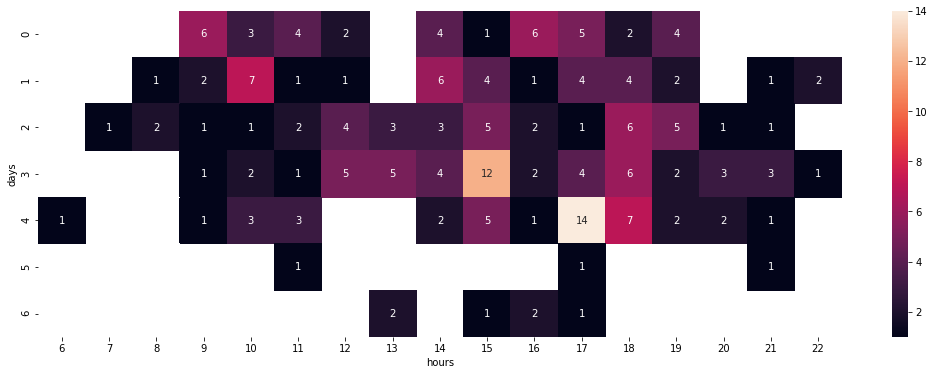

In [30]:

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

pdCommits['timestamp'] = pd.to_datetime(pdCommits['author_date'], format="%Y-%m-%d %H:%M:%S")
pdCommits['hours'] = pdCommits.timestamp.dt.hour
pdCommits['days'] = pdCommits.timestamp.dt.dayofweek
fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pdCommits.groupby(['days', 'hours'])['timestamp'].count().unstack(), annot=True, ax=ax)

The diagram shows the week with Monday (0) to Sunday (6). Someone seams to work at the weekend too :-) Find out who it is!

In [36]:
pdCommits[pdCommits['days'].isin([5,6])]

,hash,author_email,author_name,committer_email,committer_name,author_date,committer_date,author_timezone,committer_timezone,no_of_modifications,commit_message_len,project_name,parents,merge,in_main_branch,branches,timestamp,hours,days
85,063e74d1c06b1d0f3c62d34c5668c434f39a5d0f,cgote@ethz.ch,Christoph Gote,cgote@ethz.ch,Christoph Gote,2019-09-15 13:12:06,2019-09-15 13:12:06,-7200,-7200,1,11,git2net4analysis,6a34bb3979f1ef490f9471dd7c80466a542907d0,0,1,master,2019-09-15 13:12:06,13,6
86,d32df107ed2d75c741726e88e39ba8b3f46b146f,cgote@ethz.ch,Christoph Gote,cgote@ethz.ch,Christoph Gote,2019-09-15 13:15:02,2019-09-15 13:15:02,-7200,-7200,1,24,git2net4analysis,063e74d1c06b1d0f3c62d34c5668c434f39a5d0f,0,1,master,2019-09-15 13:15:02,13,6
93,241c3c3323b96ae44066b3606dece85472684943,jan.philip.wahle@gmail.com,Jan Philip,jan.philip.wahle@gmail.com,Jan Philip,2019-11-02 21:54:15,2019-11-02 21:54:15,-3600,-3600,1,49,git2net4analysis,5e36e186bc2bff8c03318d7152b7fed5b98774ea,0,1,master,2019-11-02 21:54:15,21,5
129,f58d707088feea78fae16aedd5bc70d38b0fe6fd,gotec@me.com,Christoph Gote,gotec@me.com,Christoph Gote,2020-08-02 15:27:48,2020-08-02 15:27:48,0,0,1,34,git2net4analysis,c01b3ec7daa11deca4814952540158409c06331a,0,1,master,2020-08-02 15:27:48,15,6
130,089ec3abb570f10df47de38af129366a314be9f7,gotec@me.com,Christoph Gote,gotec@me.com,Christoph Gote,2020-08-02 16:13:01,2020-08-02 16:13:01,0,0,1,41,git2net4analysis,f58d707088feea78fae16aedd5bc70d38b0fe6fd,0,1,master,2020-08-02 16:13:01,16,6
136,de3e1c627111cc56856dfe54c4ee3a02b0d62aea,Sebastian.Zug@informatik.tu-freiberg.de,Sebastian Zug,Sebastian.Zug@informatik.tu-freiberg.de,Sebastian Zug,2020-08-29 11:22:18,2020-08-29 11:22:18,-7200,-7200,1,25,git2net4analysis,f22aa1b58e0563644285bd3dce4a040e266a3408,0,1,master,2020-08-29 11:22:18,11,5
141,636d6f31a6e4e97a99f39e302bc4cda952e7f363,gotec@me.com,Christoph Gote,gotec@me.com,Christoph Gote,2020-11-15 17:47:25,2020-11-15 17:47:25,0,0,1,45,git2net4analysis,8051f5cb881fad44f526f033cd45ed9cb0fd2db6,0,1,master,2020-11-15 17:47:25,17,6
199,0ade8b9347b9a7078c2349f183a3c2c8470ac51c,gotec@me.com,Christoph Gote,noreply@github.com,GitHub,2020-08-30 16:21:06,2020-08-30 16:21:06,-7200,-7200,0,74,git2net4analysis,"f22aa1b58e0563644285bd3dce4a040e266a3408,de3e1...",1,1,master,2020-08-30 16:21:06,16,6
200,e56c7dacd4c8d20d9f4fb1cd88d4f565abd28de7,gotec@me.com,Christoph Gote,noreply@github.com,GitHub,2021-01-30 17:22:48,2021-01-30 17:22:48,-3600,-3600,0,81,git2net4analysis,"a5caf7ec7e7efa21e4747b8d1e7fd719ab76dcba,3b14e...",1,1,master,2021-01-30 17:22:48,17,5
